# Capstone 2: Modeling (Match Winner Predictor)

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

## Individual Player Preprocessing

### Reading in the Individual Player Files

In [2]:
X_train = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/X_train_ind.csv')
X_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [3]:
X_train.head()

,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,kills_ct,...,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam
0,-0.435906,-0.464604,0.064459,-0.009613,-0.899852,-0.322610,-0.424950,-0.761278,-0.414130,-1.364995,...,0,0,0,0,0,0,0,0,0,0
1,3.227906,-0.873878,0.271812,3.608984,-0.011025,1.303165,2.642961,3.018150,0.816729,2.525977,...,0,0,0,0,0,0,0,0,0,0
2,0.519871,-1.283152,-0.764951,-0.268085,-0.011025,0.461393,0.969555,0.896553,2.457873,-1.148830,...,0,0,0,0,0,0,0,0,0,0
3,-0.754498,2.400315,0.893870,-0.526556,0.877802,-0.322610,-1.261653,-0.862560,0.406443,-0.284169,...,0,1,0,0,0,0,0,0,0,0
4,0.201279,-0.464604,-0.142893,2.058157,-0.011025,-0.347368,0.272303,0.795271,0.406443,0.148161,...,0,1,0,0,0,0,0,0,0,0


In [4]:
y_train = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/y_train_ind.csv')
y_train.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
y_train.head()

,match_outcome
0,Win
1,Win
2,Win
3,Win
4,Loss


In [6]:
X_test = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/X_test_ind.csv')
X_test.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [7]:
X_test.head()

,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,kills_ct,...,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Cambodia,Iceland,Iran,Montenegro,Venezuela
0,-0.117313,0.353944,0.271812,0.248858,-0.011025,0.114781,-0.285499,0.560722,0.816729,0.364326,...,0,0,0,0,0,0,0,0,0,0
1,-0.276610,-0.464604,-2.216421,-0.268085,-0.899852,1.146364,1.248456,0.688658,0.406443,-1.797325,...,0,0,0,0,0,0,0,0,0,0
2,0.679167,-0.055330,-0.350246,0.507329,-0.899852,1.534239,0.830105,1.147093,0.406443,0.580491,...,0,0,0,0,0,0,0,0,0,0
3,-0.595202,0.353944,-0.142893,0.507329,0.877802,-0.446400,-0.424950,-0.862560,-0.414130,-1.148830,...,0,1,0,0,0,0,0,0,0,0
4,0.041983,-0.055330,0.893870,0.248858,-0.899852,0.874026,-0.564400,-0.313503,-0.414130,-0.068004,...,0,1,0,0,0,0,0,0,0,0


In [8]:
y_test = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/Individual Data/y_test_ind.csv')
y_test.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [9]:
y_test.head()

,match_outcome
0,Win
1,Win
2,Win
3,Loss
4,Loss


### Training Models

The first model we will fit with our training data is a logistic regression model (max entropy). Since we have a binary label, this model makes sense as a starting point for this notebook. Since we don't care more or less about false negatives then we do false postives, our evaluation metric will just be the accuracy score of our models.

In [10]:
# Fit a logistic regression model with our training data.
LR = LogisticRegression()
param_grid = {'C':[0.1, 1.0, 10.0], 'penalty':['none', 'l2'], 'solver':['lbfgs']} # solvers don't work well in grid search
LR_cv = RandomizedSearchCV(LR, param_grid, cv=5, scoring='accuracy', n_iter=20)
LR_cv.fit(X_train, y_train)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Pl

C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklear

C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.1, 1.0, 10.0],
                                        'penalty': ['none', 'l2'],
                                        'solver': ['lbfgs']},
                   scoring='accuracy')

In [11]:
# Print results.
print('Hyperparameter settings that resulted in max accuracy score for training set: {}'.format(LR_cv.best_params_))
print('Max accuracy score for training set: {}'.format(LR_cv.best_score_))
print('Amount of time it took to fit the best model with our training data: {}'.format(LR_cv.refit_time_), 'seconds')

Hyperparameter settings that resulted in max accuracy score for training set: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}
Max accuracy score for training set: 0.819091747965712
Amount of time it took to fit the best model with our training data: 1.2526483535766602 seconds


In [12]:
# Recreate the best model from our RandomizedSearchCV and refit with our training data.
LR_best = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')
LR_best.fit(X_train, y_train)

# Predict label values on our test data.
y_pred = LR_best.predict(X_test)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\justi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


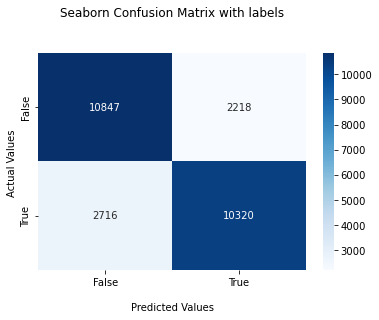

In [13]:
# Plot the confusion matrix for our test data and label predictions.
pl = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(pl, annot=True, cmap='Blues', fmt='g') # converts numbers out of scientific notation in the plot

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [14]:
# Print the classification report to view the accuracy score.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.80      0.83      0.81     13065
         Win       0.82      0.79      0.81     13036

    accuracy                           0.81     26101
   macro avg       0.81      0.81      0.81     26101
weighted avg       0.81      0.81      0.81     26101

